In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import sklearn.model_selection as md_select

In [2]:
dataset = pd.read_csv('heartdisease.csv')
dataset


male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  

[4238 rows x 16 columns]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
dataset.shape


(4238, 16)

In [5]:
#counting missing values
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
count=0
for i in dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',(count/len(dataset.index))*100, 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 13.732892873997168 percent of the entire dataset the rows with missing values are excluded.


In [7]:
finaldt = dataset
#finaldt["cigsPerDay"].fillna(finaldt.groupby("currentSmoker")["cigsPerDay"].transform("mean"), inplace=True)

In [8]:
finaldt.dropna(axis=0,inplace=True)

In [9]:
finaldt.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
finaldt

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4231     1   58        3.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4231                0             1         0    187.0  141.0   81.0  24.96   
4232                0             1         0    176.0  168.0   97.0  23.14   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4231       80.0     81.0           0  
4232       60.0     79.0           1  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4237       80.0    107.0           0  

[3656 rows x 16 columns]

<AxesSubplot:xlabel='gender', ylabel='count'>

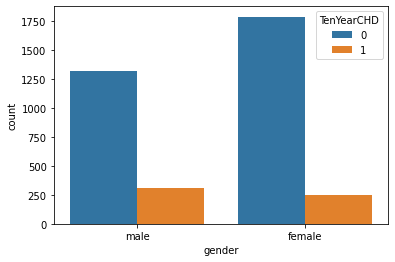

In [11]:
finaldt_plot = finaldt.copy()
finaldt_plot['male']  = finaldt_plot['male'].replace({0: 'female', 1:'male'})
finaldt_plot = finaldt_plot.rename(columns={'male':'gender'})
sns.countplot(data=finaldt_plot, x='gender', hue='TenYearCHD')

<AxesSubplot:>

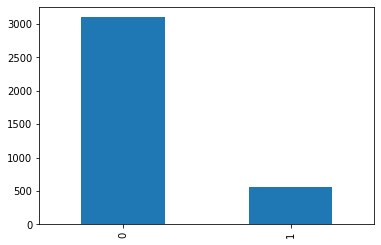

In [12]:
finaldt['TenYearCHD'].value_counts().plot(x =finaldt['TenYearCHD'], kind='bar')
#10 year CHD between male and female

In [13]:
finaldt.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [14]:
finaldt = finaldt.drop(['education','BMI','glucose'], axis = 1)
finaldt.head()


male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP  heartRate  TenYearCHD  
0             0         0    195.0  106.0   70.0       80.0           0  
1             0         0    250.0  121.0   81.0       95.0           0  
2             0         0    245.0  127.5   80.0       75.0           0  
3             1         0    225.0  150.0   95.0       65.0           1  
4             0         0    285.0  130.0   84.0       85.0           0

In [15]:
x_train = finaldt.drop(['TenYearCHD'], axis = 1)
y_train = finaldt['TenYearCHD']

In [16]:
X = np.array(x_train)
Y = np.array(y_train)


In [17]:
X

array([[  1. ,  39. ,   0. , ..., 106. ,  70. ,  80. ],
       [  0. ,  46. ,   0. , ..., 121. ,  81. ,  95. ],
       [  1. ,  48. ,   1. , ..., 127.5,  80. ,  75. ],
       ...,
       [  1. ,  50. ,   1. , ..., 179. ,  92. ,  66. ],
       [  1. ,  51. ,   1. , ..., 126.5,  80. ,  65. ],
       [  0. ,  52. ,   0. , ..., 133.5,  83. ,  80. ]])

In [18]:
Y

array([0, 0, 0, ..., 1, 0, 0])

In [19]:
#function to calculate sigmoid
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [20]:
def cost_function(x,y,theta):
    m = float(len(y)) #square error division my 1/m
    h = sigmoid(np.dot(x, theta)) #hypothesis = g(htheta) where g is sigmoid
    cost = (1 / m) * (np.dot(-y, np.log(h)) - np.dot((1 - y), np.log(1 - h)))
    return cost.sum()